In [1]:
#dependencies
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
 

In [2]:
file_path = "C:/Users/Mahanthesh/OneDrive/Documents/40_B_exits_c.csv"
data = pd.read_csv(file_path)

data.head()

C:\Users\Mahanthesh\AppData\Local\Temp\ipykernel_4800\3743020224.py:2: DtypeWarning: Columns (5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,sort_id,date_d_m_y,time,sensor_id,sensor_type,temp_C,hpa_div_4,batterylevel,sensor_cycle
0,1,5.02.2016,13:01:06,310,B,1612,24861,0,66
1,3,5.02.2016,13:01:16,306,B,1737,24865,0,69
2,6,5.02.2016,13:02:40,368,B,1941,24842,0,78
3,12,5.02.2016,13:03:32,367,B,1811,24834,0,78
4,20,5.02.2016,13:04:13,365,B,1577,24842,0,75


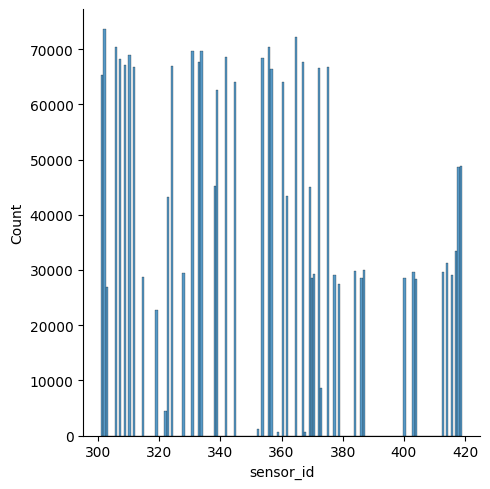

In [3]:
sns.displot(data['sensor_id']);


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302977 entries, 0 to 2302976
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   sort_id       int64 
 1   date_d_m_y    object
 2   time          object
 3   sensor_id     int64 
 4   sensor_type   object
 5   temp_C        object
 6   hpa_div_4     int64 
 7   batterylevel  object
 8   sensor_cycle  object
dtypes: int64(3), object(6)
memory usage: 158.1+ MB


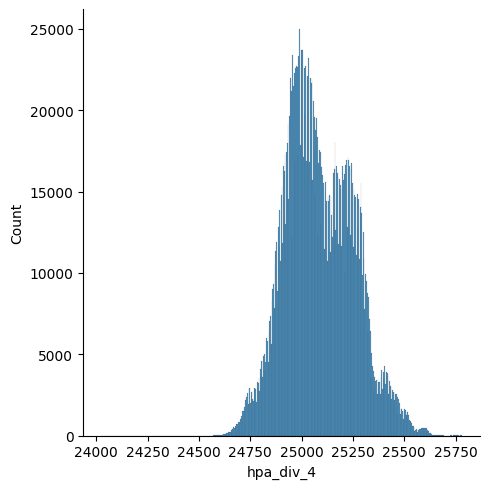

In [5]:
sns.displot(data['hpa_div_4']);

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sort_id,2302977.0,6.228853e+06,3.528902e+06,1.0,3169251.0,6512853.0,9276035.0,12041167.0
sensor_id,2302977.0,3.503299e+02,3.456451e+01,301.0,323.0,352.0,372.0,419.0
hpa_div_4,2302977.0,2.508628e+04,1.672818e+02,24024.0,24964.0,25067.0,25211.0,25781.0


In [7]:
data.columns

Index(['sort_id', 'date_d_m_y', 'time', 'sensor_id', 'sensor_type', 'temp_C',
       'hpa_div_4', 'batterylevel', 'sensor_cycle'],
      dtype='object')

In [8]:
data.shape

(2302977, 9)

In [9]:
data.isnull().sum() # eksik veri yok

sort_id         0
date_d_m_y      0
time            0
sensor_id       0
sensor_type     0
temp_C          0
hpa_div_4       0
batterylevel    0
sensor_cycle    0
dtype: int64

In [10]:
data.index.sort_values()

RangeIndex(start=0, stop=2302977, step=1)

In [11]:
data["hpa_div_4"].nunique()

1213

In [12]:
data["sensor_id"].nunique()

58

In [13]:
data["sensor_type"]

0          B
1          B
2          B
3          B
4          B
          ..
2302972    B
2302973    B
2302974    B
2302975    B
2302976    B
Name: sensor_type, Length: 2302977, dtype: object

In [14]:
data["batterylevel"].nunique()

1718

In [15]:
data["sensor_cycle"].nunique()

20002

In [16]:
data['date_d_m_y'] = pd.to_datetime(data['date_d_m_y'], format='%d.%m.%Y')
data




,sort_id,date_d_m_y,time,sensor_id,sensor_type,temp_C,hpa_div_4,batterylevel,sensor_cycle
0,1,2016-02-05,13:01:06,310,B,1612,24861,0,66
1,3,2016-02-05,13:01:16,306,B,1737,24865,0,69
2,6,2016-02-05,13:02:40,368,B,1941,24842,0,78
3,12,2016-02-05,13:03:32,367,B,1811,24834,0,78
4,20,2016-02-05,13:04:13,365,B,1577,24842,0,75
...,...,...,...,...,...,...,...,...,...
2302972,12040414,2017-03-16,21:56:13,384,B,400,25217,905,66
2302973,12040586,2017-03-16,22:01:43,384,B,396,25215,905,69
2302974,12040777,2017-03-16,22:07:13,384,B,393,25213,905,72
2302975,12040969,2017-03-16,22:12:44,384,B,390,25215,905,75


In [17]:
data["date_d_m_y"].min()

Timestamp('2016-02-05 00:00:00')

In [18]:
data["date_d_m_y"].max()

Timestamp('2017-03-16 00:00:00')

In [19]:
data.sort_values(by=["sensor_id"], ascending=True, inplace=True)
data

,sort_id,date_d_m_y,time,sensor_id,sensor_type,temp_C,hpa_div_4,batterylevel,sensor_cycle
1380480,7615082,2016-11-17,10:43:43,301,B,1115,25283,901,6134
196591,911383,2016-05-26,14:20:16,301,B,3959,24898,0,4662
1955875,11195631,2017-02-21,19:27:26,301,B,1051,25037,878,9334
1200171,6750815,2016-11-01,02:13:55,301,B,301,25184,908,3762
64420,282385,2016-03-10,13:16:31,301,B,2669,24805,0,6726
...,...,...,...,...,...,...,...,...,...
2058982,11781278,2017-03-11,04:14:33,419,B,1469,24734,984,549
825141,4705525,2016-09-18,20:39:36,419,B,3424,24918,1013,8764
1350828,7473452,2016-11-14,18:44:23,419,B,1773,25316,1004,6725
1350863,7473636,2016-11-14,18:49:30,419,B,1768,25319,1004,6728


In [20]:
data.groupby('sort_id').agg("hpa_div_4").head()

1380480    25283
196591     24898
1955875    25037
1200171    25184
64420      24805
           ...  
2058982    24734
825141     24918
1350828    25316
1350863    25319
1388784    25296
Name: hpa_div_4, Length: 2302977, dtype: int64

In [21]:
print("Initial Missing Values:")
print(data.isnull().sum())

Initial Missing Values:
sort_id         0
date_d_m_y      0
time            0
sensor_id       0
sensor_type     0
temp_C          0
hpa_div_4       0
batterylevel    0
sensor_cycle    0
dtype: int64


In [22]:
#locally weighted algorithm
def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.asmatrix(np.eye(m))
    for j in range(m):
        diff = point - xmat[j, 1]  # Use xmat[j, 1] to get the scalar value
        weights[j, j] = np.exp(diff ** 2 / (-2.0 * k ** 2))
    return weights


In [23]:
def local_weight(point, xmat, ymat, k, lmbda=0.01):
    weights = kernel(point, xmat, k)
    xTx = xmat.T * (weights * xmat)
    reg_matrix = lmbda * np.eye(xTx.shape[0])
    # Ensure xTx + reg_matrix is square
    xTx_reg = xTx + reg_matrix
    W = np.linalg.inv(xTx_reg) * (xmat.T * (weights * ymat))
    # Use [1, point] for intercept and point
    point_with_intercept = np.array([1, point])
    return float(np.dot(point_with_intercept, W))

In [24]:
def local_weighted_regression(xmat, ymat, k, lmbda=0.01):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        # Pass scalar temperature value
        ypred[i] = local_weight(xmat[i, 1], xmat, ymat, k, lmbda)
    return ypred


In [25]:
data = pd.DataFrame({
    'temp_C': [1612, 1737, 1941, 1811, 1577, 1684, 1554, 1643, 1435, 1550],
    'hpa_div_4': [24861, 24865, 24842, 24834, 24842, 24850, 24866, 24832, 24838, 24847]
})


In [26]:
# Preparing data
x = np.asmatrix(data['temp_C']).T
y = np.asmatrix(data['hpa_div_4']).T


In [27]:
m = len(x)
one = np.asmatrix(np.ones(m)).T
xmat = np.hstack((one, x))

In [28]:
# Apply LWR with ridge regularization
k = 1.0  # bandwidth parameter
lmbda = 0.01  # regularization parameter
ypred = local_weighted_regression(xmat, y, k, lmbda)

C:\Users\Mahanthesh\AppData\Local\Temp\ipykernel_4800\1779949656.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(point_with_intercept, W))


In [29]:
# Plotting
sort_index = x[:, 0].argsort(0)
x_sort = x[sort_index][:, 0]


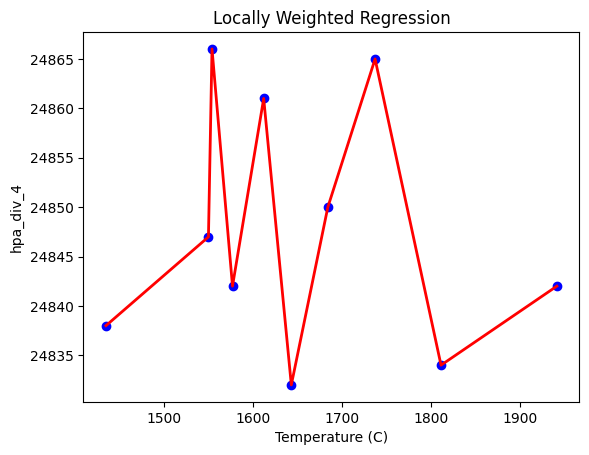

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data['temp_C'], data['hpa_div_4'], color='blue')
ax.plot(x_sort, ypred[sort_index], color='red', linewidth=2)
plt.xlabel('Temperature (C)')
plt.ylabel('hpa_div_4')
plt.title('Locally Weighted Regression')
plt.show()

In [31]:
#FFNN algorithm
# Example data
data = pd.DataFrame({
    'temp_C': [1612, 1737, 1941, 1811, 1577, 1684, 1554, 1643, 1435, 1550],
    'hpa_div_4': [24861, 24865, 24842, 24834, 24842, 24850, 24866, 24832, 24838, 24847]
})

In [32]:
# Preparing data
X = data[['temp_C']].values
y = data['hpa_div_4'].values

In [33]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1))  # Output layer with 1 neuron (regression output)

c:\Users\Mahanthesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 617293888.0000 - val_loss: 617517312.0000
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 617119552.0000 - val_loss: 617512448.0000
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 617264064.0000 - val_loss: 617507520.0000
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 617154176.0000 - val_loss: 617503104.0000
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 617492224.0000 - val_loss: 617498112.0000
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 617477248.0000 - val_loss: 617492864.0000
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 617152576.0000 - val_loss: 617486784.0000
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 617102912.0000 - val_loss: 617480448.0000
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 617412352.0000 - val_loss: 617472768.0000
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 617160896.0000 - val_loss: 617463488.000

In [38]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

Test Loss: 562432640.0


In [39]:
# Predict on new data
ypred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [40]:
# Print predictions
print("Predictions:")
print(ypred)

Predictions:
[[1522.2776]
 [ 756.0332]]
